In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go




In [3]:
udemy_data=pd.read_csv('C:/Georgian/SEM-1/BDAT-1004_DP/Final_Project/Datasets/udemy_courses.csv')
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
udemy_data.drop(['course_id','url'], axis=1, inplace=True)
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         3678 non-null   object 
 1   is_paid              3678 non-null   bool   
 2   price                3678 non-null   int64  
 3   num_subscribers      3678 non-null   int64  
 4   num_reviews          3678 non-null   int64  
 5   num_lectures         3678 non-null   int64  
 6   level                3678 non-null   object 
 7   content_duration     3678 non-null   float64
 8   published_timestamp  3678 non-null   object 
 9   subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 262.3+ KB


In [5]:
udemy_data.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [6]:
udemy_data.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


True     3368
False     310
Name: is_paid, dtype: int64


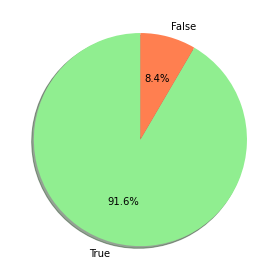

In [7]:
#is_paid Vs number of subscribers
print(udemy_data['is_paid'].value_counts())
colors = ['lightgreen', 'coral']
plt.pie(udemy_data['is_paid'].value_counts(), labels = ['True', 'False'], autopct='%1.1f%%', colors = colors, shadow = True, startangle = 90)
plt.tight_layout()

Text(0, 0.5, 'Subscriber count')

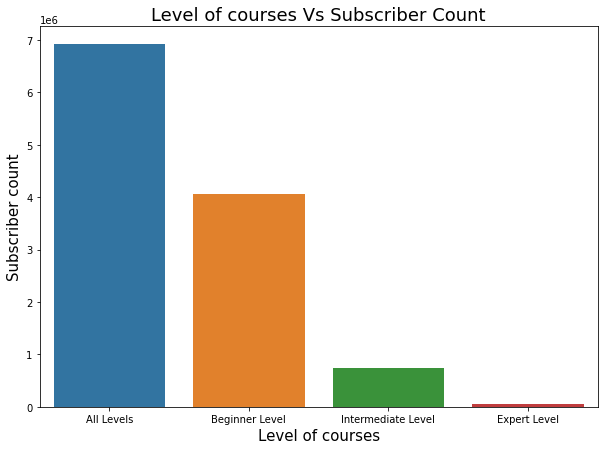

In [8]:
#level of courses Vs number ofsubscribers(Question-2)
course = udemy_data.loc[:, ['level','num_subscribers']]
course['count'] = course.groupby('level')['num_subscribers'].transform('sum')
course = course.sort_values('count', ascending=False)
course.drop('num_subscribers', axis=1, inplace=True)
course = course.drop_duplicates().reset_index(drop=True)
course = course.head()

fig = plt.figure(figsize=(10,7))
plt.title('Level of courses Vs Subscriber Count',size=18)
sns.barplot(data=course, x='level', y='count')
plt.xlabel('Level of courses',size=15)
plt.ylabel('Subscriber count',size=15)

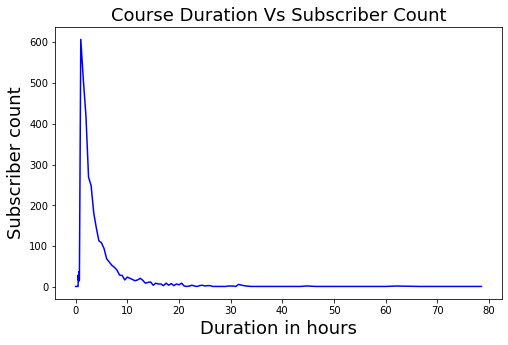

In [9]:
#Content duration Vs number of subscribes(Question-3)
count_courses=udemy_data.groupby(['content_duration'])['num_subscribers'].count()
count_courses.plot.line(figsize=(8,5),color='blue');
plt.title('Course Duration Vs Subscriber Count',size=18);
plt.xlabel('Duration in hours',size=18);
plt.ylabel('Subscriber count',size=18);
#fig = plt.figure(figsize=(20,16))

In [12]:
#subjects have most subscribers(Question-4)
subject = udemy_data.loc[:, ['subject','num_subscribers']]
subject = subject.groupby('subject')['num_subscribers'].max().reset_index()
subject = subject.sort_values('num_subscribers', ascending=False)
subject = subject.head(5)
fig = plt.figure(figsize=(10,7))

fig = px.pie(subject, names='subject', values='num_subscribers', template='seaborn')
fig.update_traces(rotation=90, pull=0.04, textinfo="percent+label")
fig.show()

<Figure size 720x504 with 0 Axes>